# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
#Step 1

## libraries are from Activity 11.3.1
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
##  from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
## libraries from Activity 11.4.1
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
## libraries from Activity 11.4.2
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
## libraries from Activity 11.4.3
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
## libraries from Activity 11.5.3
from sklearn.preprocessing import StandardScaler
## libraries from Activity 11.7.3
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import permutation_importance
## libraries from 11.5.3 plus
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2

## Loading the dataset file

from google.colab import files
titanic = files.upload()




Saving Titanic.csv to Titanic.csv


In [ ]:
## Setting up dataframe

titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Dataframe shape

titanic.shape

(891, 12)

In [ ]:
## Statistics of each feature

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## Data types

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
## Checking that data is set up correctly 

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
## Check for NaN's in each feature

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 3

## Split data into target variable and features of interest
## Dropping PassengerId, Name, and Ticket as irrelevant
## Dropping Cabin due to high percentage of NaN values

y = titanic[['Survived']]
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
                 
X.head()

print(X)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 4  

## One-Hot encode ** Impute/standardize after building model

one_hot = pd.get_dummies(data = X, columns = ['Sex','Embarked'])
X = pd.DataFrame(one_hot)
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
## Split data into training dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Feature summary in training data

X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000
mean,2.333832,29.421343,0.553892,0.372754,32.179397,0.342814,0.657186,0.17515,0.086826,0.735030
std,0.823707,14.526010,1.185279,0.795588,51.604012,0.475006,0.475006,0.38038,0.281791,0.441648
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.00000,1.000000,1.000000


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
# Step 5

## Build pipeline to impute and standardize the data and fit a Logistic Regression model
## Using mean values for Age and Embarked
## Using standardization as it works best on classifiction models

pipe_std = Pipeline([
  ('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
  ('scaler', StandardScaler()),
  ('log_reg', LogisticRegression(random_state=0))])





In [ ]:
## Fit pipeline to training data

pipe_std.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [ ]:
#Step 6

train_accuracy_std = pipe_std.score(X_train, y_train)

print(train_accuracy_std)
print('The standardized data training accuracy is', train_accuracy_std)

0.8038922155688623
The standardized data training accuracy is 0.8038922155688623


In [ ]:
## Validation data model accuracy using cross-validation, cv = 5

scores = cross_val_score(pipe_std, X_train, y_train, cv = 5)
print(scores)
print(scores.mean())
print(scores.std())

[0.79850746 0.8358209  0.78358209 0.7443609  0.80451128]
0.7933565256424643
0.029833853516419907


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

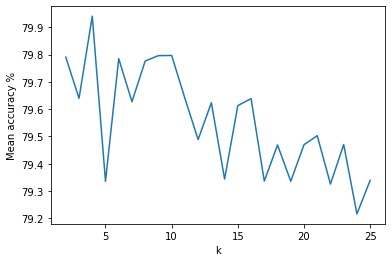

In [ ]:
## Exploring different values of k
## Print mean accuracy for different values of k

k = list(range(2,26))
## we are creating some type of empty list 
mean_accuracy = []

##  code will run through iterations of i
for i in k:
  scores = cross_val_score(pipe_std, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

## create dataframe to store values in and plotting them out
k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()


Optimal k value is 4.

In [ ]:
## Final validation data model accuracy
## Rerun cross-validation using optimal value of k, cv=4
## Because we are working with small dataset, best to limit at 4. If we used next highest mean accuracy of 6 splits, we would risk getting higher variance.

scores = cross_val_score(pipe_std, X_train, y_train, cv = 4)
print(scores)
print(scores.mean())
print(scores.std())

[0.77245509 0.8742515  0.76047904 0.79041916]
0.7994011976047904
0.04450918786622307


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Baseline validation model score of .7994, 79.9% and variance of 0.0445.

In [ ]:
## Test model fit accuracy - Result is simular to training accuracy which is good indication for this base model.

test_accuracy_std = pipe_std.score(X_test, y_test)
print('The testing accuracy is', test_accuracy_std)

The testing accuracy is 0.8071748878923767


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 7

## First model using Gradient Boosting Classifier, which is further developed into a second model that fits the data best, compared to all other models.

GradientBoost = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('Gradient', GradientBoostingClassifier(random_state=42))])
GradientBoost.fit(X_train, y_train)

GradientBoost_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
print(GradientBoost_scores)

print(GradientBoost_scores.mean())
print(GradientBoost_scores.std())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

[0.85074627 0.74626866 0.85074627 0.86567164 0.79104478 0.7761194
 0.79104478 0.79104478 0.78787879 0.90909091]
0.8159656264133875
0.04760230911588494


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy of .8159, 81.5% and variance of 0.0476.

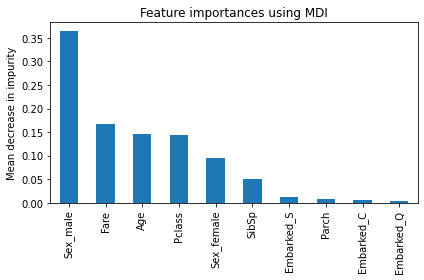

In [ ]:
feature_importances_ = pd.Series(GradientBoost.named_steps['Gradient'].feature_importances_, index=X.columns)

feature_importances = feature_importances_.sort_values(ascending=False)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

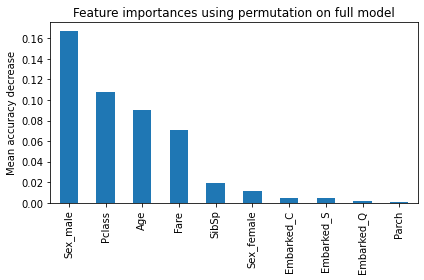

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(GradientBoost.named_steps['Gradient'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


*** BEST PERFORMING MODEL BELOW *** 

BELOW - Continue with Gradient Boosting Classifier by removing Parch and Embarked to improve model

In [ ]:
## Revised code 
## Split data into target variable and features of interest
## Data exploration
##  *** removed Parch and Embarked
y = titanic[['Survived']]
X = titanic[['Pclass','Sex','Age','SibSp','Fare']]
                 
X.head()

print(X)

     Pclass     Sex   Age  SibSp     Fare
0         3    male  22.0      1   7.2500
1         1  female  38.0      1  71.2833
2         3  female  26.0      0   7.9250
3         1  female  35.0      1  53.1000
4         3    male  35.0      0   8.0500
..      ...     ...   ...    ...      ...
886       2    male  27.0      0  13.0000
887       1  female  19.0      0  30.0000
888       3  female   NaN      1  23.4500
889       1    male  26.0      0  30.0000
890       3    male  32.0      0   7.7500

[891 rows x 5 columns]


In [ ]:
##  ** Revised code**  *** One-hot encode *** Impute/standardize after building model
## removed Embarked

one_hot = pd.get_dummies(data = X, columns = ['Sex'])
X = pd.DataFrame(one_hot)
X.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male
0,3,22.0,1,7.2500,0,1
1,1,38.0,1,71.2833,1,0
2,3,26.0,0,7.9250,1,0
3,1,35.0,1,53.1000,1,0
4,3,35.0,0,8.0500,0,1


In [ ]:
## Split data into training dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Second model using Gradient Boosting which fits the data best compared to all other models.

GradientBoost = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('Gradient', GradientBoostingClassifier(random_state=42))])
GradientBoost.fit(X_train, y_train)

GradientBoost_scores = cross_val_score(GradientBoost, X_train, y_train, cv=10)
print(GradientBoost_scores)

print(GradientBoost_scores.mean())
print(GradientBoost_scores.std())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

[0.85074627 0.74626866 0.8358209  0.88059701 0.79104478 0.7761194
 0.8358209  0.82089552 0.77272727 0.89393939]
0.8203980099502488
0.04584661170933986


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy of .8203, 82% and variance of 0.0458.
Slight improvement by using less features. Variance is still low.



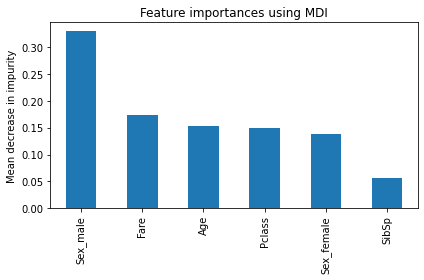

In [ ]:
feature_importances_ = pd.Series(GradientBoost.named_steps['Gradient'].feature_importances_, index=X.columns)

feature_importances = feature_importances_.sort_values(ascending=False)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

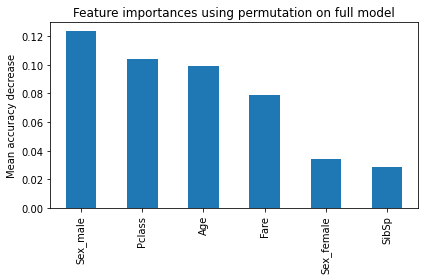

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(GradientBoost.named_steps['Gradient'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
## Test model score

GradientBoost.score(X_test, y_test)

0.8161434977578476

*** BEST PERFORMING MODEL ABOVE***

BELOW - Continue next with Random Forest Modeling *** 

In [ ]:
## Split data into target variable and features of interest - FIRST REDUCTION OF FEATURES
## Dropping PassengerId, Name, and Ticket as irrelevant
## Dropping Cabin due to high percentage of NaN values

y = titanic[['Survived']]
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
                 
X.head()

print(X)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [ ]:
##  One-Hot encode ** Impute/standardize after building model - FIRST REDUCTION OF FEATURES

one_hot = pd.get_dummies(data = X, columns = ['Sex','Embarked'])
X = pd.DataFrame(one_hot)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
## Split data into training dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Feature summary in training data

X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000
mean,2.333832,29.421343,0.553892,0.372754,32.179397,0.342814,0.657186,0.17515,0.086826,0.735030
std,0.823707,14.526010,1.185279,0.795588,51.604012,0.475006,0.475006,0.38038,0.281791,0.441648
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
## Using Random Forest - *Default parameters

forest     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42))])

forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, cv=10)

print(scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

0.787584803256445


Model accuracy score of .7878, 78.7%

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

   max_depth  mean accuracy
1          4      82.489824
2          5      82.342831
4          7      82.342831
7         10      82.046585
3          6      82.044324
8         11      81.594301
5          8      81.298055
6          9      80.698779
9         12      80.251018
0          3      80.248756


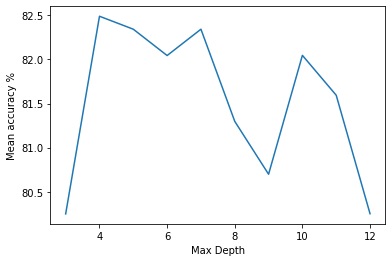

In [ ]:
## Looking for possible value to change the depth hyperparameter i 

## creating a list
mean_accuracy = []

## creating for max depth of 3,4, ... and building tree, then printing it out
for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42, max_depth=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


max_depth_df = pd.DataFrame([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
max_depth_df.rename({0:'max_depth'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([max_depth_df, mean_accuracy_df], axis=1)
## print out results in ascending order
print(to_plot.sort_values('mean accuracy', ascending = False))

plt.plot(to_plot['max_depth'], to_plot['mean accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Mean accuracy %')
plt.show()

Max depth of 4 gave highest accuracy of 82.489.

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

   max_features  mean accuracy
0             3      82.489824
2             5      82.487562
1             4      82.193578
5             8      82.037540
3             6      81.890547
4             7      81.741294
6             9      81.741294
7            10      81.592040


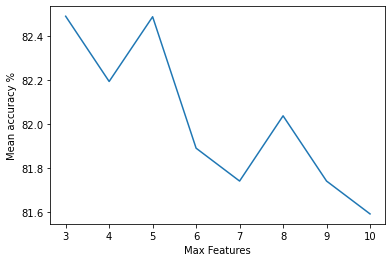

In [ ]:
## Change depth hyperparameter in model to value of 4
## Output shows max features to use for highest accuracy

mean_accuracy = []
## number of features in model
for i in [3, 4, 5, 6, 7, 8, 9, 10]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestClassifier(random_state=42, max_depth=4, max_features=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())

max_features_df = pd.DataFrame([3, 4, 5, 6, 7, 8, 9, 10])
max_features_df.rename({0:'max_features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([max_features_df, mean_accuracy_df], axis=1)
## print out results in ascending order
print(to_plot.sort_values('mean accuracy', ascending = False))

plt.plot(to_plot['max_features'], to_plot['mean accuracy'])
plt.xlabel('Max Features')
plt.ylabel('Mean accuracy %')
plt.show()

Max features of 3 features = 82.489 accuracy

Max features of 5 features is very close in accuracy score.

In [ ]:
## RandomForestClassifier.score(X_test, y_test)

pipe.score(X_test, y_test)

0.8071748878923767

Model did not perform as well on test. 

BELOW - Continue next with Ridge Regression and Lasso Regression  ***

In [ ]:
## Split data into target variable and features of interest - FIRST REDUCTION OF FEATURES
## Dropping PassengerId, Name, and Ticket as irrelevant
## Dropping Cabin due to high percentage of NaN values

y = titanic[['Survived']]
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
                 
X.head()

print(X)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female   NaN      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [ ]:
##  One-Hot encode ** Impute/standardize after building model - FIRST REDUCTION OF FEATURES

one_hot = pd.get_dummies(data = X, columns = ['Sex','Embarked'])
X = pd.DataFrame(one_hot)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
## Split data into training dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## Feature summary in training data

X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000
mean,2.333832,29.421343,0.553892,0.372754,32.179397,0.342814,0.657186,0.17515,0.086826,0.735030
std,0.823707,14.526010,1.185279,0.795588,51.604012,0.475006,0.475006,0.38038,0.281791,0.441648
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
## Grid search for C in Ridge Regression model

## create cv_accuracy that makes a blank list []
cv_accuracy = []
## create list called C_options with these values in it
C_options = [0.01, 0.3, 0.5, 1, 2, 5, 10]
## for anything in this list ( program does not know that option is plural) 
for option in C_options:
## do this -- C option is where it takes the C_options value after value through the loop
  pipe_l2     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=option))])
## fit line to training
  pipe_l2.fit(X_train, y_train)
## 10 fold cv, cross val accuracy, print that out
  l2_scores = cross_val_score(pipe_l2, X_train, y_train, cv=10)
  l2_cv_accuracy = l2_scores.mean()
## put cv accuracy into the list
  cv_accuracy.append(l2_cv_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

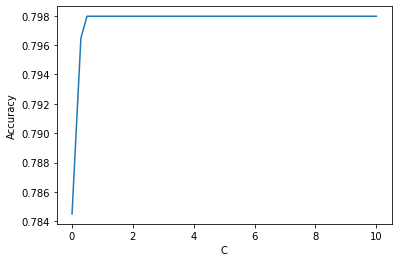

In [ ]:
## Plot mean accuracy for each value of C

plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

*See actual values of C in dataframe below

In [ ]:
## The first column is the C and the second column is the accuracy.

c_acc = pd.DataFrame(cv_accuracy)
C_opt = pd.DataFrame(C_options)

c_acc2 = pd.concat([C_opt, c_acc], axis=1)

c_acc2

,0,0
0,0.01,0.784509
1,0.30,0.796472
2,0.50,0.797965
3,1.00,0.797965
4,2.00,0.797965
5,5.00,0.797965
6,10.00,0.797965


Highest model accuracy is .797965 with C value of 0.50. As the C gets larger, the accuracy flattens out as expected. As the penalty gets larger, it goes back to the normal line. This is a small dataset. Highest C value continues onto a flat line with the same highest value.

In [ ]:
## Grid search for C in the Lasso Regression model

cv_accuracy = []
C_options = [0.01, 0.3, 0.5, 1, 2, 5, 10]

for option in C_options:
  pipe_l1     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l1', solver='liblinear', C=option))])

  pipe_l1.fit(X_train, y_train)

  l1_scores = cross_val_score(pipe_l1, X_train, y_train, cv=10)
  l1_cv_accuracy = l1_scores.mean()

  cv_accuracy.append(l1_cv_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

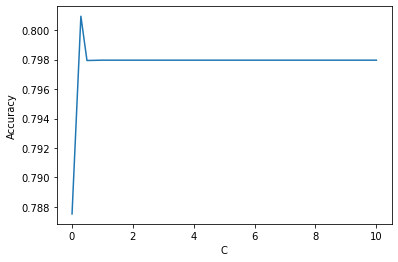

In [ ]:
## Plot mean accuracy for each value of C

plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

* See actual C values in dataframe below.

In [ ]:
##  The first column is the C and the second column is the accuracy.

c_acc = pd.DataFrame(cv_accuracy)
C_opt = pd.DataFrame(C_options)

c_acc2 = pd.concat([C_opt, c_acc], axis=1)

c_acc2

,0,0
0,0.01,0.787517
1,0.30,0.800950
2,0.50,0.797942
3,1.00,0.797965
4,2.00,0.797965
5,5.00,0.797965
6,10.00,0.797965


Value highest C value of 0.30 with accuracy score of .80

In [ ]:
## Print 10-fold CV accuracy for Ridge Regression and Lasso Regression
## **** input C value of 0.5 that was found optimal in code above for l2 model
## other model l1 hyperparameter changed from default of C=1 to C= 0.3 that was found optimal in code above

# l2 C chart
cv_l2_accuracy = []

pipe_l2 = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C = 0.5))])

pipe_l2.fit(X_train, y_train)
  
l2_scores = cross_val_score(pipe_l2, X_train, y_train, cv=10)
l2_cv_accuracy = l2_scores.mean()

cv_l2_accuracy.append(l2_cv_accuracy)

print("The mean 10-fold CV accuracy for the ridge regression model is ", cv_l2_accuracy)

# l1 C chart
cv_l1_accuracy = []

pipe_l1 = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l1', solver='liblinear', C = 0.3))])

pipe_l1.fit(X_train, y_train)
  
l1_scores = cross_val_score(pipe_l1, X_train, y_train, cv=10)
l1_cv_accuracy = l1_scores.mean()

cv_l1_accuracy.append(l1_cv_accuracy)

print("The mean 10-fold CV accuracy for the lasso regression model is", cv_l1_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

The mean 10-fold CV accuracy for the ridge regression model is  [0.7979647218453189]
The mean 10-fold CV accuracy for the lasso regression model is [0.8009497964721846]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ridge Regression accuracy score = 0.7979

Lasso Regression accuracy score 0.8009

In [ ]:
#Step 10 - *** l2 test accuracy   
## Define variable and use data we want that is in the pipe_l2

l2_test_accuracy = pipe_l2.score(X_test, y_test)

print(l2_test_accuracy)

0.8026905829596412


In [ ]:
#Step 10 - *** l1 test accuracy  
## Define variable and use data we want that is in the pipe_l2

l1_test_accuracy = pipe_l1.score(X_test, y_test)

print(l1_test_accuracy)

0.7937219730941704


# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
# Step 8

## Second Gradient Boosting Classifier model fit the data best upon testing with accuracy score of .8161, 81.6%.

## ** See above duplicate test code at end of Second Gradient Boost model OR need to rerun whole model to be able to run test code in this code block.

GradientBoost.score(X_test, y_test)

0.8161434977578476

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

How did you identify the model target and features? 

* The Titanic data set provided labeled data that could be used in supervised machine learning models once some adjustments were made to explore what factors may have contributed to the likelihood of survival. 

What steps did you take to prepare the data for modeling?

* Dropped irrelevant features
* Encoded some features to numeric variables
* Standardized measurments
* Imputed missing data to mean values

Which baseline model did you choose and why? How did you evaluate the model's performance?

* Logistic Regression was evaluated using cross-validation, cv=4, and test data accuracy scores.

Which other model(s) did you choose and why? How did you evaluate the model's performace?

* Gradient Boosting Classifer test accuracy score = .8161
* Random Forest test accuracy score = .8071
* Ridge Regression test accuracy score = .7937
* Lasso Regression test accuracy score = .8026

What was the best model you developed? How well did the model perform on the test data?

* The second revised feature version of the Gradient Boosting Classifier model performed best with .8161, 81.6% accuracy. Feature importances using both MDI and permutation allowed development of a better model with fewer features, which outperformed all the other models.